In [34]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.datasets import imdb

In [35]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [36]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [37]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [38]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [39]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [40]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [41]:
model=Sequential([
    Dense(16,activation='relu',input_shape=(10000,)),
    Dropout(0.5),
    Dense(16,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])


c:\Users\BHAV KORAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
h=model.fit(partial_x_train,partial_y_train,epochs=100,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9786 - loss: 0.0781 - val_accuracy: 0.8854 - val_loss: 0.5416
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9788 - loss: 0.0771 - val_accuracy: 0.8827 - val_loss: 0.5707
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9800 - loss: 0.0716 - val_accuracy: 0.8793 - val_loss: 0.6055
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9814 - loss: 0.0668 - val_accuracy: 0.8833 - val_loss: 0.5927
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9823 - loss: 0.0672 - val_accuracy: 0.8813 - val_loss: 0.6504
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9837 - loss: 0.0604 - val_accuracy: 0.8808 - val_loss: 0.7051
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9806 - loss: 0.0757 - val_accuracy: 0.8811 - val_loss: 0.6553
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9849 - loss: 0.0569 - val_accuracy: 0.8802 - 

In [74]:
acc=model.evaluate(X_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8555 - loss: 2.4758


In [76]:
print(acc)

[2.357573986053467, 0.8593199849128723]


In [77]:
history_dict = h.history

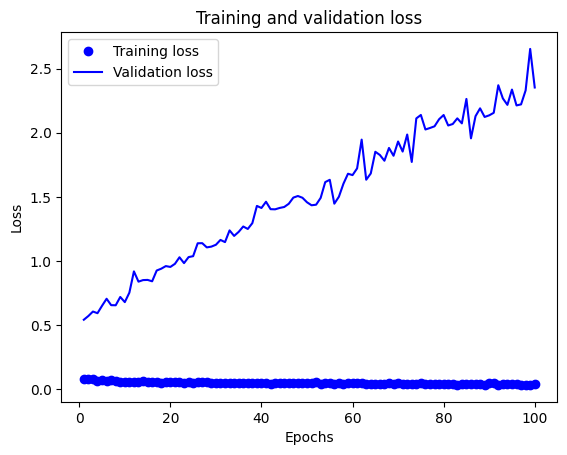

In [78]:
import matplotlib.pyplot as plt
plt.clf()
loss_val=history_dict['loss']
val_loss_values = history_dict['val_loss']
ep=range(1,len(loss_val)+1)
plt.plot(ep,loss_val,'bo',label='Training loss')
plt.plot(ep,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

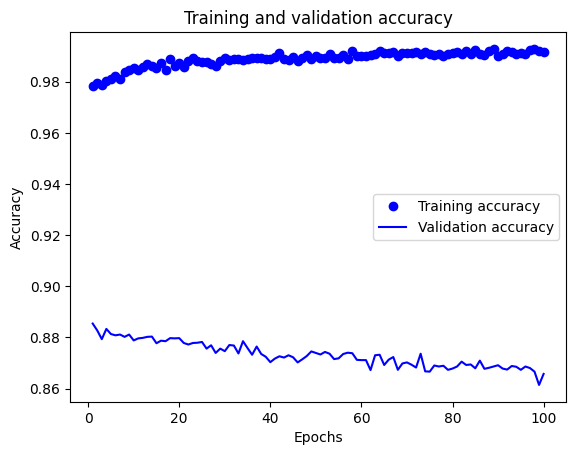

In [79]:
plt.clf()
accc=history_dict['accuracy']
val_accc=history_dict['val_accuracy']
plt.plot(ep,accc,'bo',label='Training accuracy')
plt.plot(ep,val_accc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.03332022],
       [1.        ],
       [1.        ],
       ...,
       [0.0022448 ],
       [0.0304201 ],
       [0.9995921 ]], dtype=float32)

In [81]:
test_data=' movie was wonderful and great'
test_data=test_data.split()
test_data=[word_index[word] for word in test_data]
test_data=[test_data]
test_data=vectorize_sequences(test_data)
xx=model.predict(test_data)
if(xx>0.5):
    print('Positive')
else:
    print('Negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Positive
